<a href="https://colab.research.google.com/github/delrio-jaemee/CSST106-CS4B-DELRIO/blob/main/4B_DEL_RIO_EXER_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIFT Feature Extraction

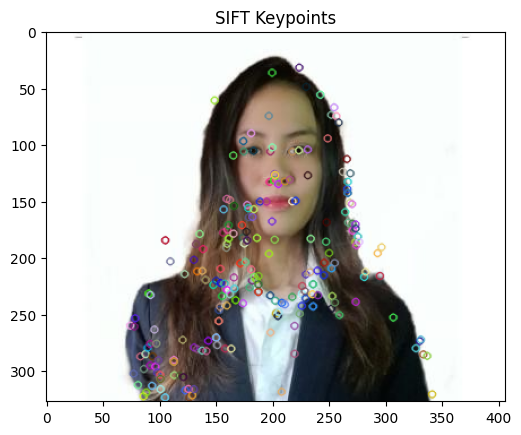

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/jaem.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize Sift Detector
sift = cv2.SIFT_create()

# Detect keypoint and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

SURF Feature Extraction

In [ ]:
!pip install opencv-contrib-python==4.5.5.64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
# Initialize SURF Detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

Licensing issues we cannot implement SURF method

ORB Feature Extraction

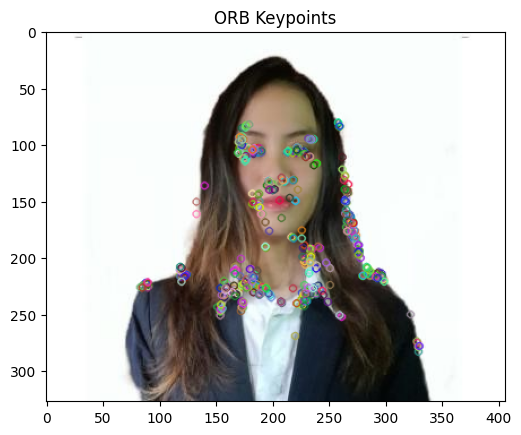

In [ ]:
# Initialize ORB Detector
orb = cv2.ORB_create()

# Initialize keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

 Feature Matching using SIFT

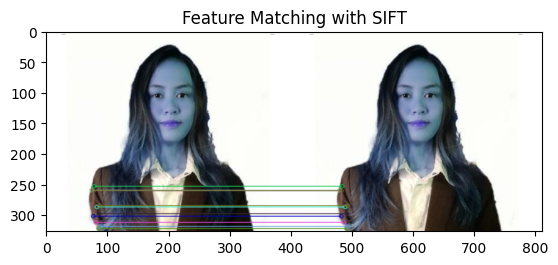

In [ ]:
# Load two images
image1 = cv2.imread('/content/jaem.jpg')
image2 = cv2.imread('/content/jaem.jpg')

# Initiliaze SIFT Detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

Real World Applications (Image Stitching using Homography)

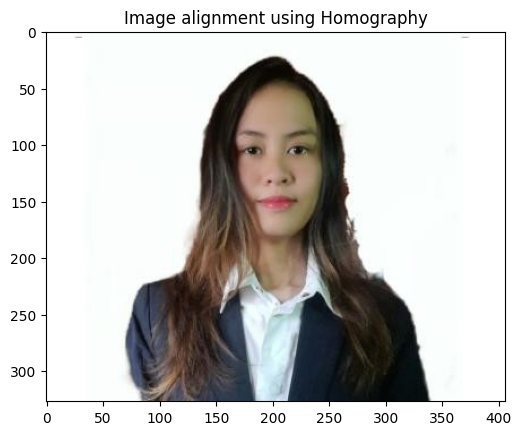

In [ ]:
import numpy as np

# Load Images
image1 = cv2.imread('/content/jaem.jpg')
image2 = cv2.imread('/content/jaem.jpg')

# Convert Images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Match Features using BF Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)

dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Find Homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp one image to align with other
h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Image alignment using Homography')
plt.show()

Combining SIFT and ORB

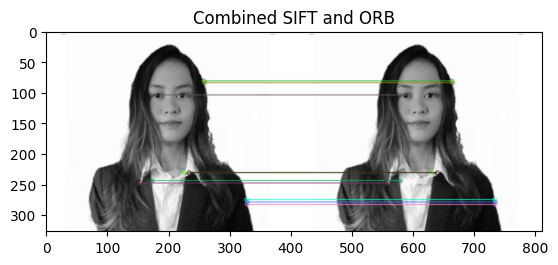

In [ ]:
# Load Images
image1 = cv2.imread('/content/jaem.jpg', 0)
image2 = cv2.imread('/content/jaem.jpg', 0)

# SIFT Detector
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# ORB Detector
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# You can match keypoints from both SIFT and ORB using a matcher of your choice
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort the matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Combined SIFT and ORB')
plt.show()